In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [19]:
df = pd.read_csv(
    r"C:\Users\adrie\OneDrive\Desktop\data_amazon.csv",
    thousands=",",
    encoding="latin1",       
    parse_dates=["Date"],
    date_format="%b %d, %Y"
)

In [29]:
df.columns = (
    df.columns
      .str.replace("\xa0", " ", regex=False)   
      .str.strip()                             
)

print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [31]:
num_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

In [35]:
df = df.sort_values("Date").reset_index(drop=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       139 non-null    object 
 1   Open       139 non-null    float64
 2   High       139 non-null    float64
 3   Low        139 non-null    float64
 4   Close      139 non-null    float64
 5   Adj Close  139 non-null    float64
 6   Volume     139 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.7+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,1-Apr-24,180.79,186.27,178.38,185.07,185.07,176830900
1,1-Jan-24,151.54,152.38,144.05,145.24,145.24,197957800
2,1-Jul-24,193.49,200.55,192.82,200.00,200.00,158248800
3,1-May-23,104.95,105.96,101.15,105.66,105.66,315546600
4,10-Apr-23,100.96,103.20,97.71,102.51,102.51,273789600


In [37]:
display(df.describe(include='all'))

print("\nDate range:", df["Date"].min().date(), "→", df["Date"].max().date())
print("Missing values:\n", df.isna().sum())

print("\nLast 5 rows:")
display(df.tail())

,Date,Open,High,Low,Close,Adj Close,Volume
count,139,139.000000,139.000000,139.000000,139.000000,139.000000,1.390000e+02
unique,139,NaN,NaN,NaN,NaN,NaN,NaN
top,1-Apr-24,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,167.173525,172.487698,162.438489,168.194101,168.194101,2.305173e+08
std,NaN,41.807808,42.408227,40.873960,41.450514,41.450514,8.138264e+07
min,NaN,85.460000,86.980000,81.430000,86.080000,86.080000,1.499677e+07
25%,NaN,132.010000,136.715000,127.895000,132.715000,132.715000,1.761728e+08
50%,NaN,176.940000,181.700000,171.410000,177.040000,177.040000,2.230093e+08
75%,NaN,199.025000,203.410000,192.675000,197.940000,197.940000,2.766536e+08


AttributeError: 'str' object has no attribute 'date'

In [41]:
df["Date"] = pd.to_datetime(df["Date"], format="%b %d, %Y")

In [43]:
print(df["Date"].head())
print(df["Date"].dtype)

0   2024-04-01
1   2024-01-01
2   2024-07-01
3   2023-05-01
4   2023-04-10
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [45]:
df["ret_log"] = np.log(df["Adj Close"]).diff()

In [47]:
df["SMA20"] = df["Adj Close"].rolling(20).mean()
df["SMA50"] = df["Adj Close"].rolling(50).mean()

In [49]:
delta = df["Adj Close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
roll_up = pd.Series(gain).rolling(14).mean()
roll_down = pd.Series(loss).rolling(14).mean()
rs = roll_up / roll_down
df["RSI14"] = 100 - (100 / (1 + rs))

In [51]:
df["vol_annualized"] = df["ret_log"].rolling(20).std() * np.sqrt(52)

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ret_log,SMA20,SMA50,RSI14,vol_annualized
134,2024-12-09,227.21,231.20,224.20,227.46,227.46,170377300,0.724133,167.6345,168.3004,51.770021,3.466696
135,2023-01-09,87.46,98.37,87.08,98.12,98.12,406953100,-0.840783,162.1315,167.6556,50.025357,3.715363
136,2025-06-09,214.75,218.40,209.62,212.10,212.10,165709600,0.770867,165.8250,167.7974,49.657411,3.876041
137,2023-10-09,126.22,134.48,124.76,129.79,129.79,223009300,-0.491140,163.9675,168.4952,52.050652,3.950040
138,2024-09-09,174.53,188.50,173.51,186.49,186.49,167875500,0.362460,164.5695,167.4714,49.945743,3.995639


C:\Users\adrie\AppData\Local\Temp\ipykernel_32680\3222911783.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


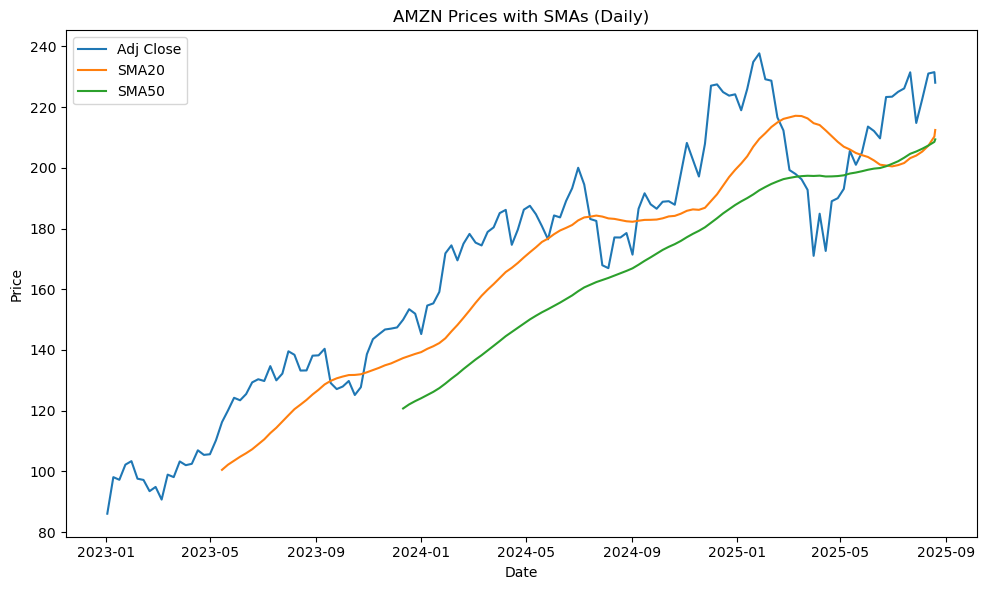

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"C:\Users\adrie\OneDrive\Desktop\data_amazon.csv",
    thousands=",",
    encoding="latin1",
    parse_dates=["Date"],   
)

df.columns = df.columns.str.replace("\xa0", " ", regex=False).str.strip()

num_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")


df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).set_index("Date").sort_index()
df = df[~df.index.duplicated(keep="first")]  

base = df  

base["ret_log"] = np.log(base["Adj Close"]).diff()
base["SMA20"] = base["Adj Close"].rolling(20).mean()
base["SMA50"] = base["Adj Close"].rolling(50).mean()
base["vol_annualized"] = base["ret_log"].rolling(20).std() * np.sqrt(252)  # 52 if weekly

delta = base["Adj Close"].diff()
gain = np.where(delta > 0, delta, 0.0)
loss = np.where(delta < 0, -delta, 0.0)
roll_up = pd.Series(gain, index=base.index).rolling(14).mean()
roll_down = pd.Series(loss, index=base.index).rolling(14).mean()
rs = roll_up / roll_down
base["RSI14"] = 100 - (100 / (1 + rs))

plt.figure(figsize=(10, 6))
plt.plot(base.index, base["Adj Close"], label="Adj Close")
plt.plot(base.index, base["SMA20"], label="SMA20")
plt.plot(base.index, base["SMA50"], label="SMA50")
plt.title("AMZN Prices with SMAs" + (" (Weekly)" if "weekly" in locals() and base is weekly else " (Daily)"))
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


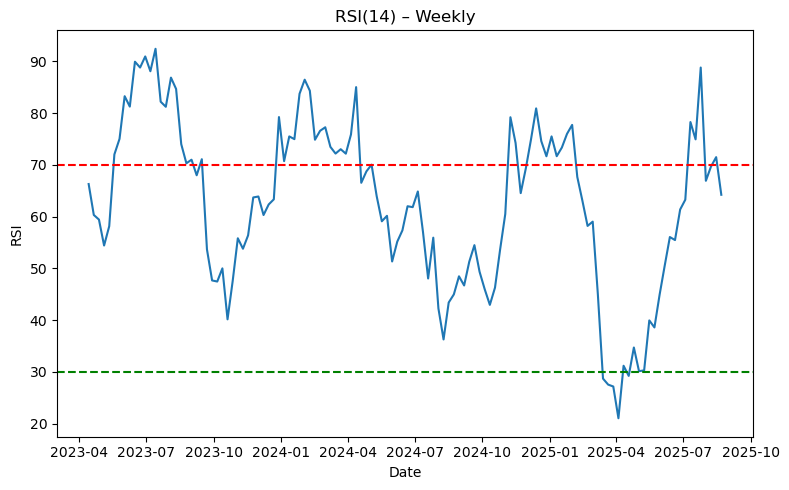

In [13]:
wk = (
    df.sort_index()  # already indexed by Date
      .resample("W-FRI")
      .last()
)
delta = wk["Adj Close"].diff()
up = delta.clip(lower=0)
down = (-delta).clip(lower=0)
r_up = up.rolling(14, min_periods=14).mean()
r_dn = down.rolling(14, min_periods=14).mean()
wk["RSI14"] = 100 - (100 / (1 + r_up/r_dn))

plt.figure(figsize=(8,5))
plt.plot(wk.index, wk["RSI14"])
plt.axhline(70, ls="--", color="r"); plt.axhline(30, ls="--", color="g")
plt.title("RSI(14) – Weekly")
plt.xlabel("Date"); plt.ylabel("RSI")
plt.tight_layout(); plt.show()

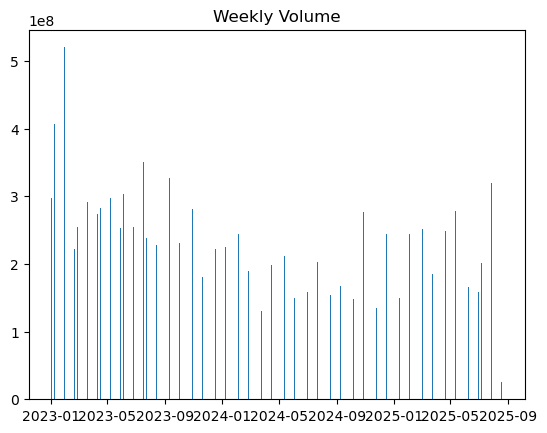

In [57]:
plt.figure()
plt.bar(df["Date"], df["Volume"])
plt.title("Weekly Volume")
plt.show()

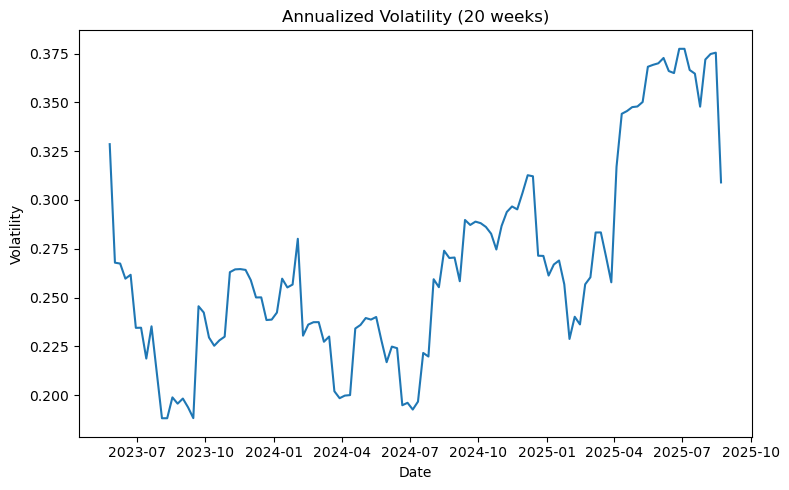

In [27]:
df = df.sort_index()
df = df[~df.index.duplicated(keep="first")]

wk = df["Adj Close"].resample("W-FRI").last()

ret_w = np.log(wk).diff()
vol20w = ret_w.rolling(20, min_periods=20).std() * np.sqrt(52)

plt.figure(figsize=(8,5))
plt.plot(vol20w.index, vol20w.values)
plt.title("Annualized Volatility (20 weeks)")
plt.xlabel("Date"); plt.ylabel("Volatility")
plt.tight_layout(); plt.show()

Slope (Trend): 0.9673
Intercept: 101.4503


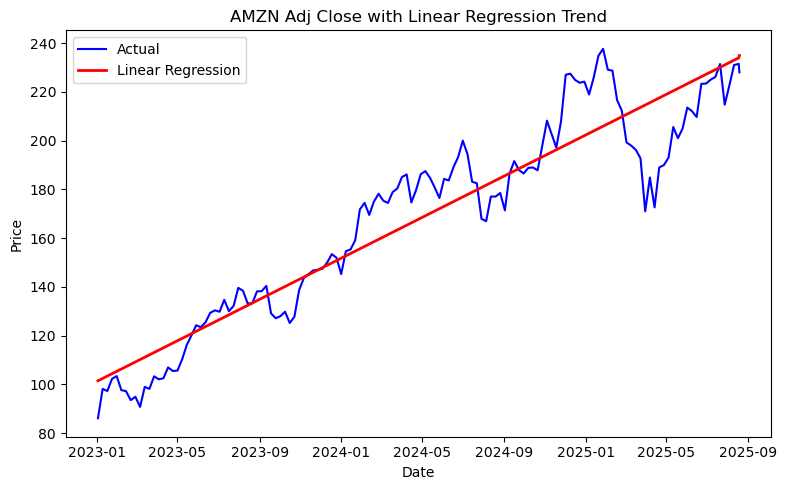

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   


ts = df[["Adj Close"]].dropna().reset_index()  
X = np.arange(len(ts)).reshape(-1, 1)          
y = ts["Adj Close"].values


model = LinearRegression()
model.fit(X, y)


print(f"Slope (Trend): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


y_pred = model.predict(X)


plt.figure(figsize=(8,5))
plt.plot(ts["Date"], y, label="Actual", color="blue")
plt.plot(ts["Date"], y_pred, label="Linear Regression", color="red", linewidth=2)
plt.title("AMZN Adj Close with Linear Regression Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
N = 73
future_idx = np.arange(len(ts), len(ts)+N).reshape(-1,1)
y_hat = model.predict(future_idx)

last_date = ts["Date"].iloc[-1]
freq = ts["Date"].diff().median()
future_dates = pd.date_range(last_date + freq, periods=N, freq=freq)

forecast_df = pd.DataFrame({"Date": future_dates, "AdjClose_Forecast_LR": y_hat})
display(forecast_df)

,Date,AdjClose_Forecast_LR
0,2024-07-11 12:00:00,167.959759
1,2024-05-13 00:00:00,167.956411
2,2024-03-14 12:00:00,167.953064
3,2024-01-15 00:00:00,167.949716
4,2023-11-16 12:00:00,167.946368
...,...,...
68,2013-06-13 12:00:00,167.732113
69,2013-04-15 00:00:00,167.728765
70,2013-02-14 12:00:00,167.725418
71,2012-12-17 00:00:00,167.722070


Slope: 0.9673, Intercept: 101.4503


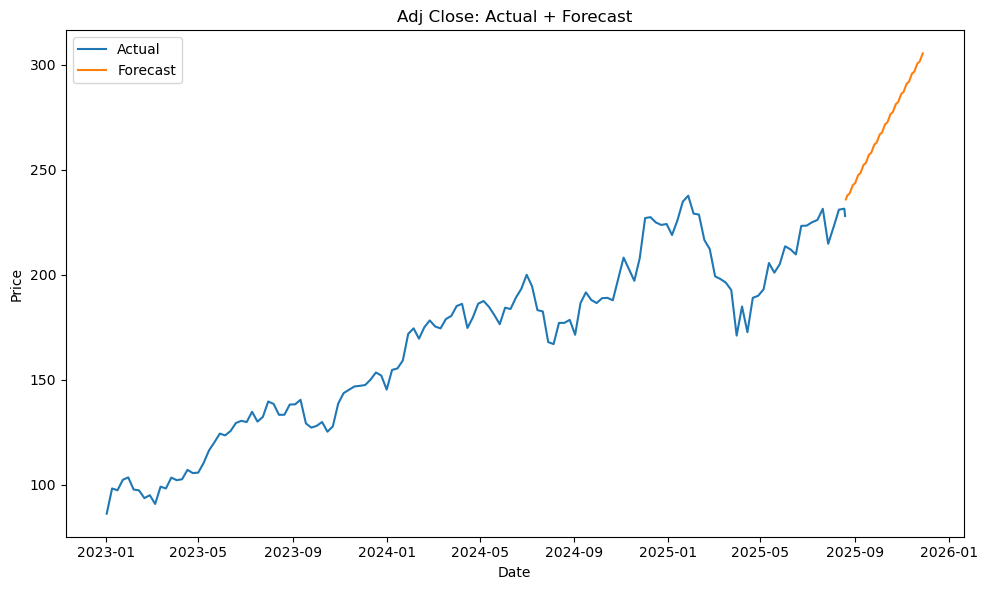

In [41]:

ts = df[["Adj Close"]].dropna().reset_index()        
ts = ts.sort_values("Date").reset_index(drop=True)


X = np.arange(len(ts)).reshape(-1, 1)
y = ts["Adj Close"].to_numpy(dtype=float)

model = LinearRegression()
model.fit(X, y)

print(f"Slope: {model.coef_[0]:.4f}, Intercept: {model.intercept_:.4f}")


h = 73  
X_future = np.arange(len(ts), len(ts) + h).reshape(-1, 1)
y_future = model.predict(X_future)                    

last_date = ts["Date"].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.BDay(1), periods=h, freq="B")

forecast_df = pd.DataFrame({
    "Date": future_dates,
    "AdjClose_Forecast_LR": y_future
})

plt.figure(figsize=(10,6))
plt.plot(ts["Date"], ts["Adj Close"], label="Actual")
plt.plot(forecast_df["Date"], forecast_df["AdjClose_Forecast_LR"], label="Forecast")
plt.title("Adj Close: Actual + Forecast")
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
def simulate_investment(df, initial_cash=10000, price_col="Adj Close"):
    df = df.sort_values("Date").dropna(subset=[price_col])
    buy_price = df[price_col].iloc[0]
    sell_price = df[price_col].iloc[-1]
    shares = initial_cash / buy_price
    final_value = shares * sell_price
    return {
        "initial": initial_cash,
        "final": final_value,
        "return_pct": (final_value/initial_cash - 1)*100
    }

res = simulate_investment(df, 10000, "Adj Close")
print("Buy-and-hold result:", res)

Buy-and-hold result: {'initial': 10000, 'final': 26488.15055762082, 'return_pct': 164.8815055762082}
